In [11]:
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
#from tensorflow.examples.tutorials.mnist import input_data
import math
from PIL import Image

In [12]:
# loading up the image
path = "abhishek.jpg"
open_ = Image.open(path)
read1 = np.array(open_)
read = read1.reshape(1,200,200,3)
read.shape


(1, 200, 200, 3)

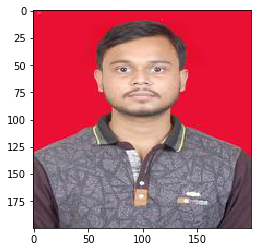

In [13]:
plt.imshow(read1)
plt.show()

In [14]:
x = tf.placeholder(tf.float32, [None, 120000],name="x-in")
true_y = tf.placeholder(tf.float32, [None, 10],name="y-in")
keep_prob = tf.placeholder("float")

x_image = tf.reshape(x,[-1,200,200,1])
hidden_1 = slim.conv2d(x_image,5,[5,5])
pool_1 = slim.max_pool2d(hidden_1,[2,2])
hidden_2 = slim.conv2d(pool_1,5,[5,5])
pool_2 = slim.max_pool2d(hidden_2,[2,2])
hidden_3 = slim.conv2d(pool_2,20,[5,5])
hidden_3 = slim.dropout(hidden_3,keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3),10,activation_fn=tf.nn.softmax)


In [15]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
def getActivations(layer,stimuli):
      units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,120000],order='F'),keep_prob:1.0})
      plotNNFilter(units)


In [16]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        plt.show()

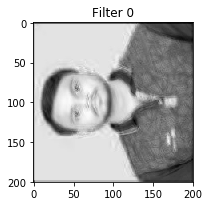

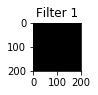

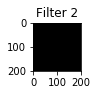

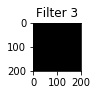

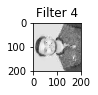

In [17]:
getActivations(hidden_1,read)